# Debate Results Analysis

Comparing accuracy across three conditions:
1. **Debater Direct**: Debater LLM answers directly
2. **Judge Direct**: Judge LLM answers directly
3. **Debate**


In [34]:
import json
import pandas as pd

In [64]:
# results_file =  'parallel_debate_runs/run_20251017_171633/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251020_090651/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251020_093933/master_results.jsonl'
results_file = 'parallel_debate_runs/run_20251020_120358/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251020_121119/master_results.jsonl'

results_df = pd.json_normalize(pd.read_json(results_file, lines=True).to_dict('records'))


In [65]:
results_df.head()

run_id                  timestamp  question.question_idx  \
0  8dd91377 1970-08-23 09:17:00.120509                     35   
1  cd1c6e8d 1970-08-23 09:17:00.120539                    188   
2  b79b872a 1970-08-23 09:17:00.120539                     57   
3  962b5b94 1970-08-23 09:17:00.120541                     75   
4  819a9e59 1970-08-23 09:17:00.120543                     26   

  question.choices_selected  \
0                    [0, 2]   
1                    [3, 0]   
2                    [0, 2]   
3                    [1, 0]   
4                    [0, 3]   

                              question.choice_values question.is_correct  \
0  [Cold atomic interstellar medium., Cold molecu...       [True, False]   
1                                   [Pion, Skyrmion]       [False, True]   
2      [Superstring Theory, Quantum Electrodynamics]       [True, False]   
3  [green signal colocalizes with the red signal,...       [False, True]   
4  [cytosol to the extracellular space, ribosome ...       [True, False]   

  question.dataset_name question.dataset_subset question.dataset_split  \
0       Idavidrein/gpqa            gpqa_diamond                  train   
1       Idavidrein/gpqa            gpqa_diamond                  train   
2       Idavidrein/gpqa            gpqa_diamond                  train   
3       Idavidrein/gpqa            gpqa_diamond                  train   
4       Idavidrein/gpqa            gpqa_diamond                  train   

   debater_direct.correct  debater_direct.confidence  debater_direct.cached  \
0                    True                         85                  False   
1                    True                         85                  False   
2                    True                         85                  False   
3                   False                         85                  False   
4                   False                         85                  False   

   judge_direct.correct  judge_direct.confidence  judge_direct.cached  \
0                  True                       85                False   
1                  True                       85                False   
2                  True                       85                False   
3                 False                       85                False   
4                 False                       85                False   

   modes.non_interactive.turns modes.non_interactive.winner  \
0                            4                            A   
1                            4                            A   
2                            4                            A   
3                            3                            A   
4                            4                            A   

   modes.non_interactive.correct  modes.non_interactive.confidence  
0                           True                                75  
1                          False                                85  
2                           True                                85  
3                          False                                85  
4                           True                                75

In [66]:
correct_cols = results_df.filter(like='correct').drop(columns='question.is_correct')
accuracies = pd.DataFrame({
    'accuracy': correct_cols.mean(),
    'total_count': correct_cols.count()
})
accuracies

accuracy  total_count
debater_direct.correct             0.53          100
judge_direct.correct               0.51          100
modes.non_interactive.correct      0.61          100

<Axes: >

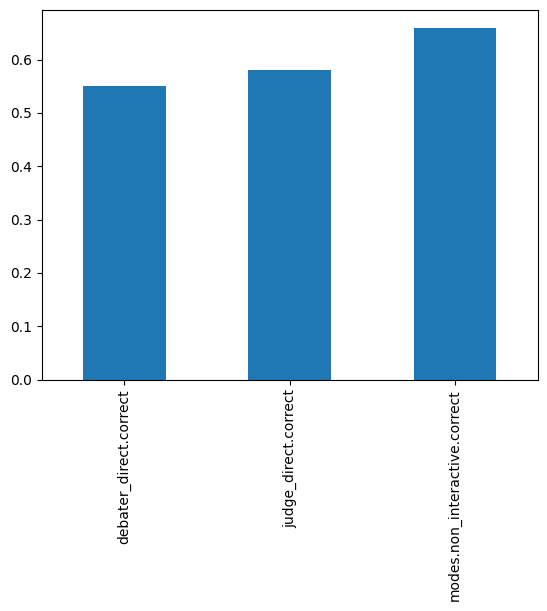

In [61]:
accuracies['accuracy'].plot.bar()